## **Biblioteca de controle de sistemas**

In [1]:
!pip install -U control;

Requirement already up-to-date: control in /usr/local/lib/python3.6/dist-packages (0.8.3)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as co

In [3]:
# %config InlineBackend.figure_format = 'svg' # plots will be save in svg format
plt.rcParams['figure.figsize'] = [18, 8]
plt.rcParams['font.size'] = 24

## **Funções de transferência (TF)**

In [4]:
G1 = co.tf([2, 5], [1, 2, 3])
G1


   2 s + 5
-------------
s^2 + 2 s + 3

Funções de transferência usando polinômios dados os polos e zeros:

In [5]:
G2 = 5 * co.tf(np.poly([-2, -5]), np.poly([-4, -5, -9]))
G2


    5 s^2 + 35 s + 50
--------------------------
s^3 + 18 s^2 + 101 s + 180

## **Cancelamento de polos/zeros (Minimum realization)**

In [6]:
co.minreal(G2)

1 states have been removed from the model



    5 s + 10
---------------
s^2 + 13 s + 36

## **Algebra de funções de transferência**

In [7]:
G3 = G1 + G2
G3


   7 s^4 + 86 s^3 + 427 s^2 + 1070 s + 1050
----------------------------------------------
s^5 + 20 s^4 + 140 s^3 + 436 s^2 + 663 s + 540

In [8]:
G4 = G1 * G2
G4


        10 s^3 + 95 s^2 + 275 s + 250
----------------------------------------------
s^5 + 20 s^4 + 140 s^3 + 436 s^2 + 663 s + 540

In [9]:
G5 = G1 / G2
G5


2 s^4 + 41 s^3 + 292 s^2 + 865 s + 900
--------------------------------------
5 s^4 + 45 s^3 + 135 s^2 + 205 s + 150

In [10]:
G6 = co.feedback(G1, G2)
G6


    2 s^4 + 41 s^3 + 292 s^2 + 865 s + 900
----------------------------------------------
s^5 + 20 s^4 + 150 s^3 + 531 s^2 + 938 s + 790

## **Propriedades das funções de transferências**


In [11]:
co.dcgain(G6)


array(1.13924051)

In [12]:
co.pole(G6)

array([-7.04718677+0.j        , -5.0969239 +0.j        ,
       -5.        +0.j        , -1.42794466+1.53615211j,
       -1.42794466-1.53615211j])

In [13]:
co.zero(G6)

array([-9. , -5. , -4. , -2.5])

In [14]:
  co.evalfr(G6, 3.5 + 5j)

(0.22014864933783368-0.24741919236498242j)

## **Função de transferência (TF) para espaço de estados (SS)**

In [15]:
G1


   2 s + 5
-------------
s^2 + 2 s + 3

In [16]:
G1_ss = co.tf2ss(G1)
G1_ss

A = [[-2. -3.]
 [ 1.  0.]]

B = [[1.]
 [0.]]

C = [[2. 5.]]

D = [[0.]]

## **Espaço de estados (SS) para função de transferência (TF)**

In [17]:
G1_tf = co.ss2tf(G1_ss)
G1_tf


   2 s + 5
-------------
s^2 + 2 s + 3

## **Espaço de estados**

In [18]:
A = [[0, 1, 0], [0, 0, 1], [-1, -2, -3]]
B = [[0], [0], [1]]
C = [1, 0, 0]
D = 0
sys7 = co.ss(A, B, C, D)

In [19]:
sys7_tf = co.ss2tf(sys7)
sys7_tf


8.882e-16 s^2 + 8.882e-16 s + 1
-------------------------------
     s^3 + 3 s^2 + 2 s + 1

## **Resposta ao impulso**

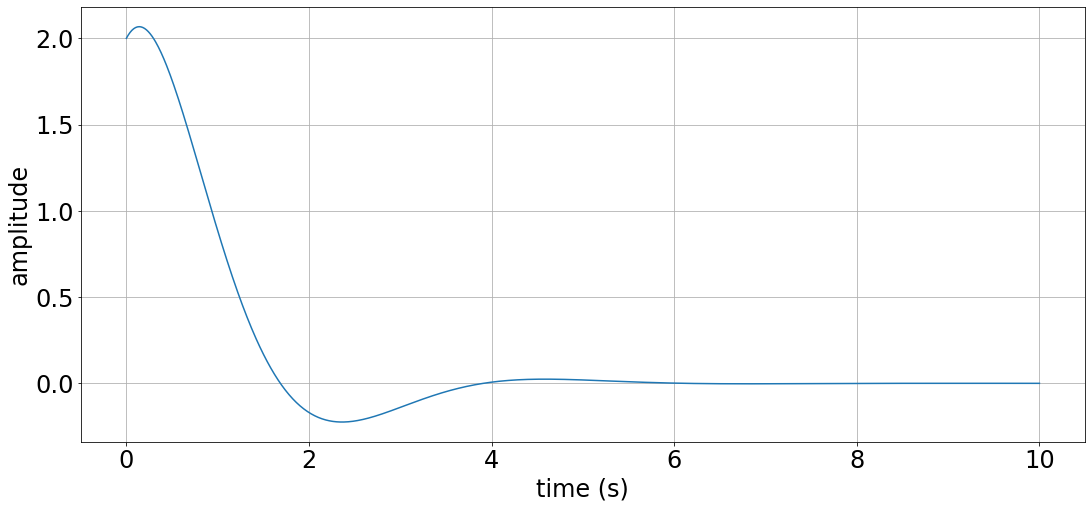

In [20]:
t = np.linspace(0, 10, 1000);
t1, y1 = co.impulse_response(G1, t)

plt.plot(t1, y1)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid()

## **Resposta ao degrau**

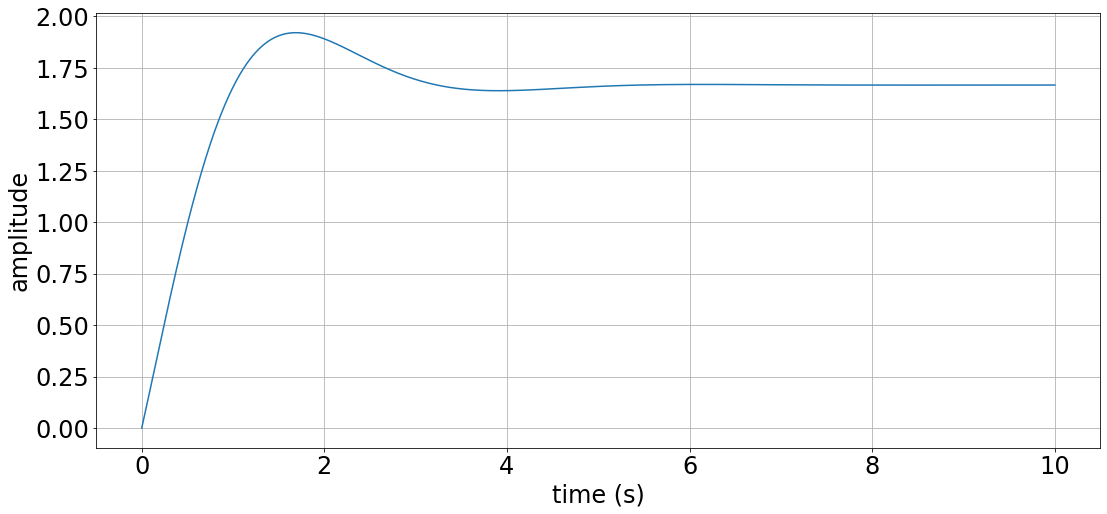

In [21]:
t = np.linspace(0, 10, 1000);
t1, y1 = co.step_response(G1, t)

plt.plot(t1, y1)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid()

## **Resposta ao pulso com condições iniciais**

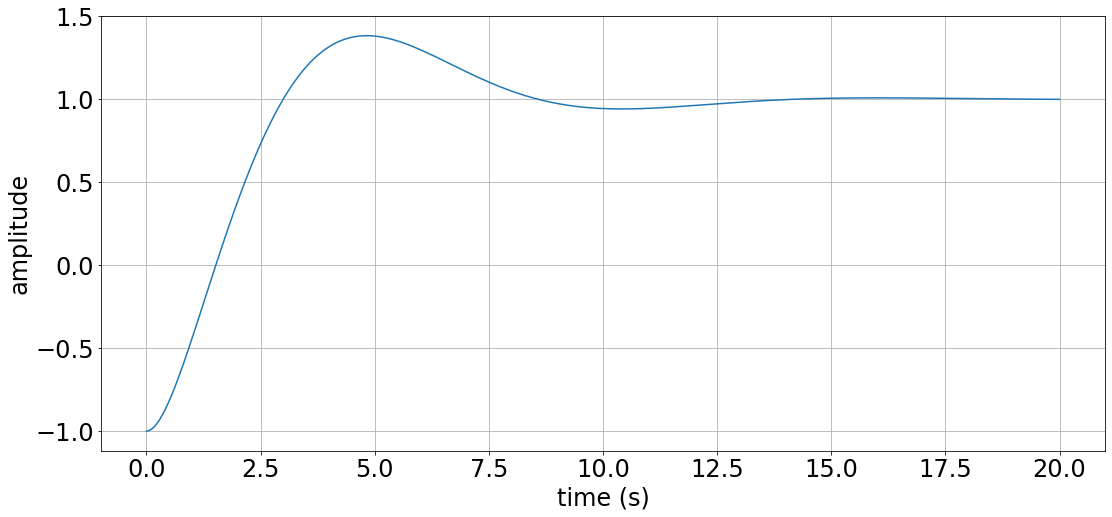

In [22]:
t = np.linspace(0, 20, 1000);
t1, y1 = co.step_response(sys7, t, [-1, 0, 2])

plt.plot(t1, y1)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid()

## **Resposta a uma entrada arbitrária**

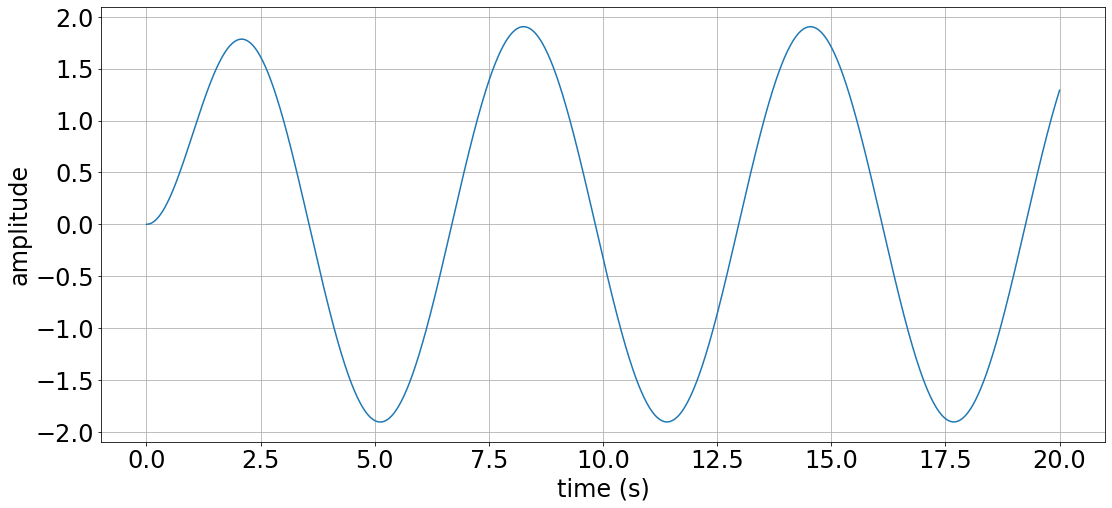

In [23]:
t = np.linspace(0, 20, 1000);
u = np.sin(t)
t1, y1, states = co.forced_response(G1, t, u)

plt.plot(t1, y1)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid()

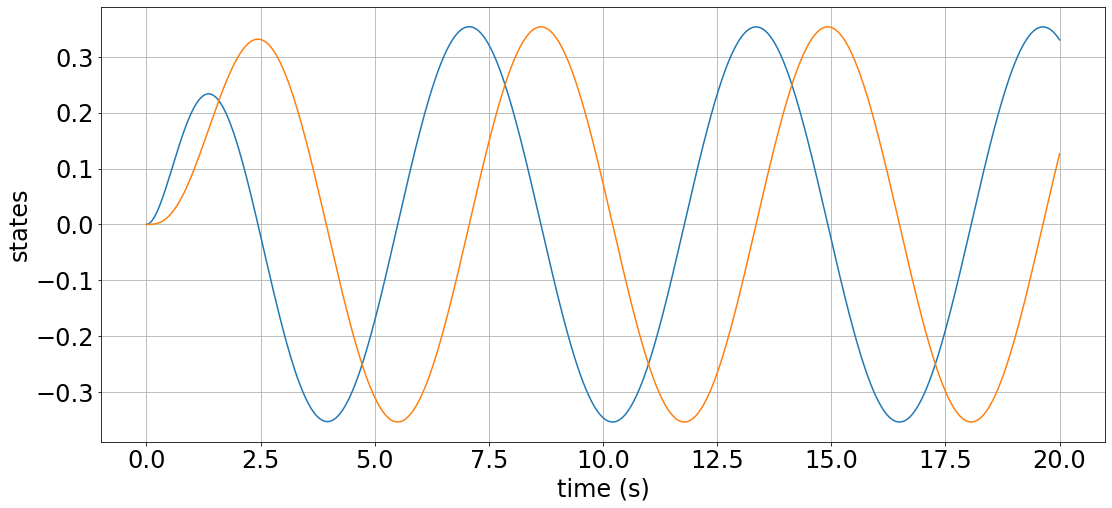

In [24]:
# estados correspondentes
plt.plot(t1, states.T)
plt.xlabel('time (s)')
plt.ylabel('states')
plt.grid()

## **Resposta a uma entrada arbitrária com condições iniciais**

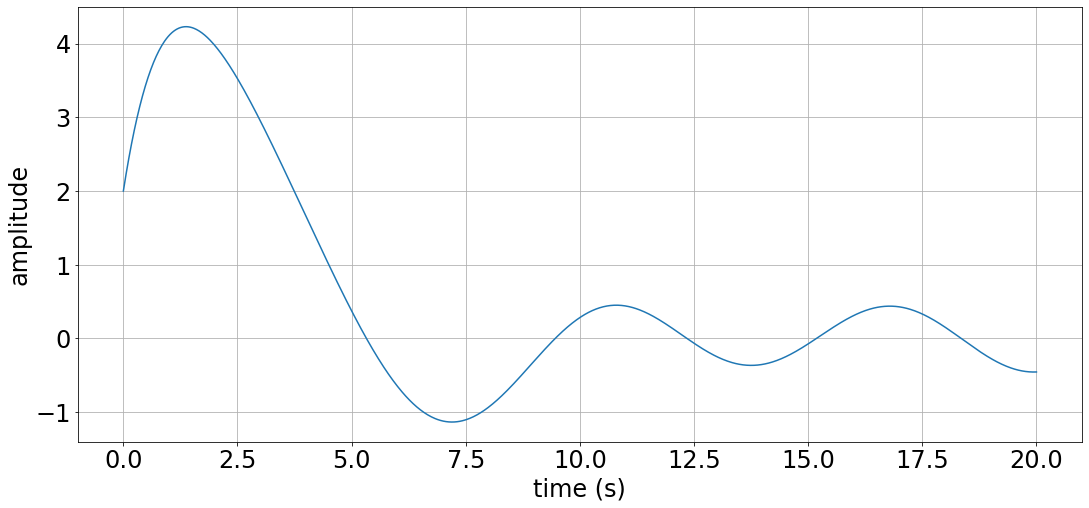

In [25]:
t = np.linspace(0, 20, 1000);
u = np.sin(t)
t1, y1, states = co.forced_response(sys7, t, u, [2, 4, -5])

plt.plot(t1, y1)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid()

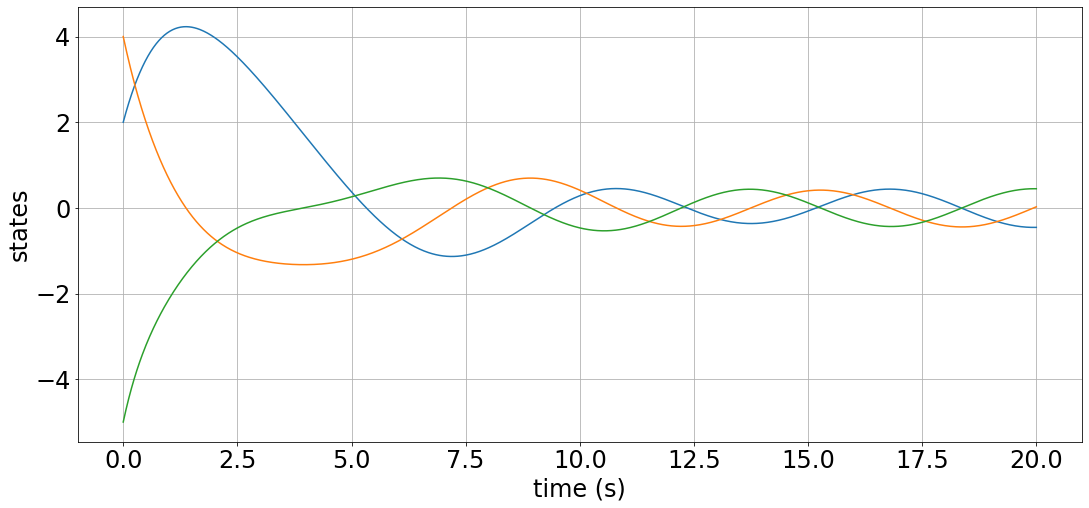

In [26]:
# estados correspondentes
plt.plot(t1, states.T)
plt.xlabel('time (s)')
plt.ylabel('states')
plt.grid()

## **Resposta a condições iniciais apenas**

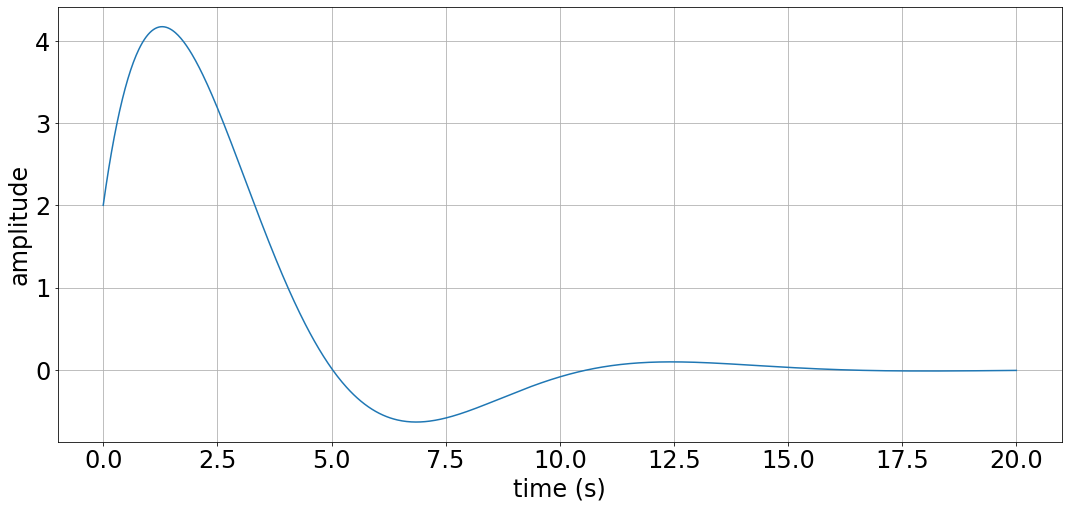

In [27]:
t = np.linspace(0, 20, 1000);
t1, y1 = co.initial_response(sys7, t, [2, 4, -5])

plt.plot(t1, y1)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid()

## **Bode Plot**

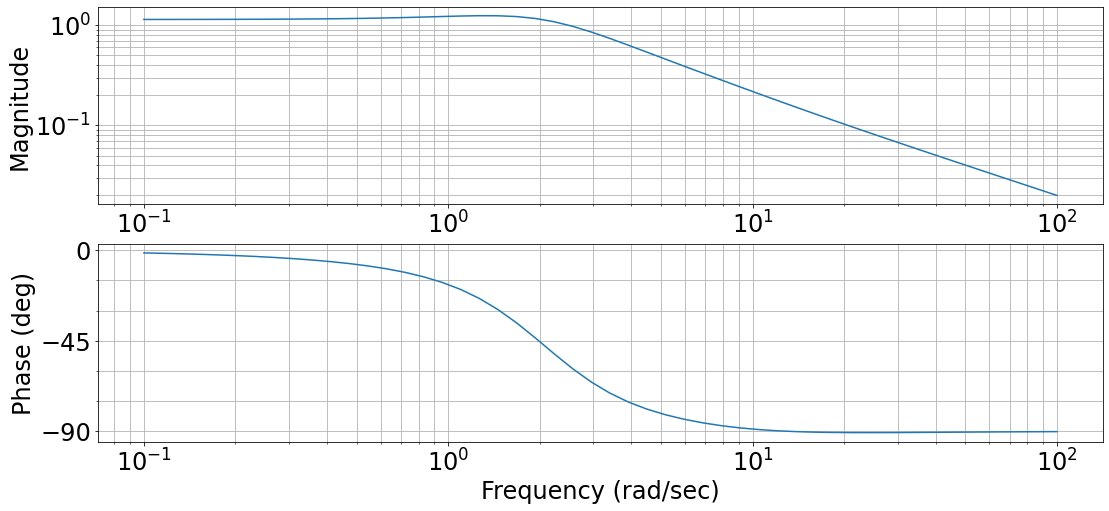

In [28]:
co.bode_plot(G6);

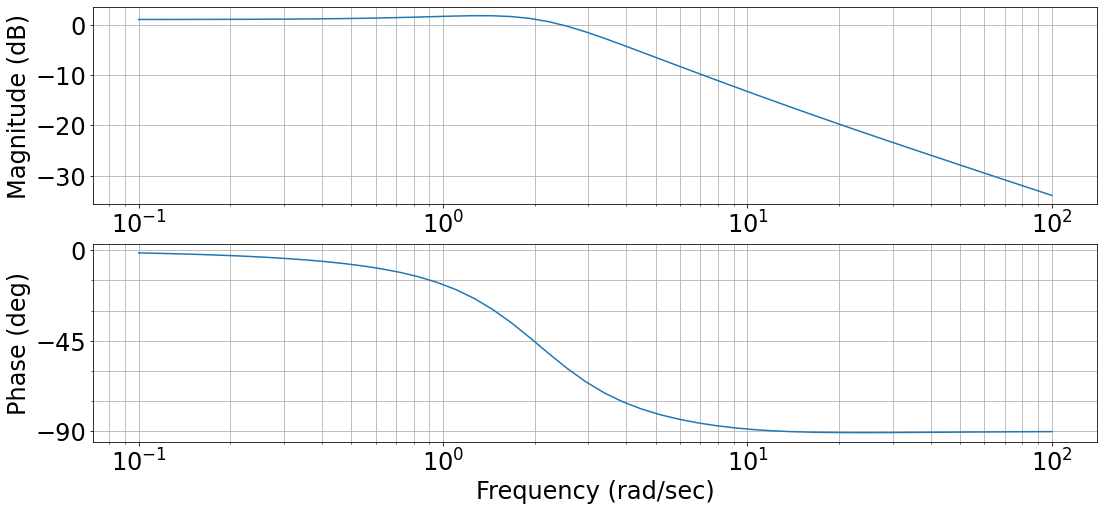

In [29]:
mag, phase, freq = co.bode_plot(G6, dB=True);

## **Nyquist Plot**

In [30]:
G = co.tf([10], [1, 2, 1])
G


      10
-------------
s^2 + 2 s + 1

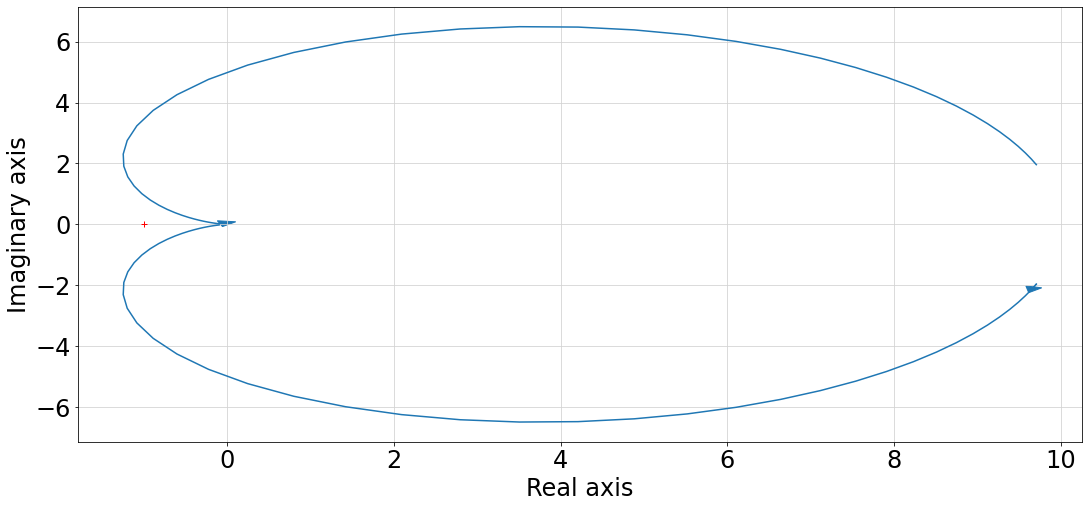

In [31]:
co.nyquist_plot(G);

## **Margem de estabilidade**

In [32]:
G8 = co.tf([10], np.poly([-1, -2, -3]))
G8


          10
----------------------
s^3 + 6 s^2 + 11 s + 6

In [33]:
GM, PM, _, PCF, GCF, _ = co.stability_margins(G8)
print(f'PCF = {PCF}, GM (abs) = {GM}, GCF = {GCF}, PM (deg) = {PM}')

PCF = 3.3166247903554, GM (abs) = 6.0, GCF = 1.0, PM (deg) = 90.0


## **Lugar Geométrico das Raízes**

In [34]:
G9 = co.tf([1], [1, 4, 5, 0])
G9


        1
-----------------
s^3 + 4 s^2 + 5 s

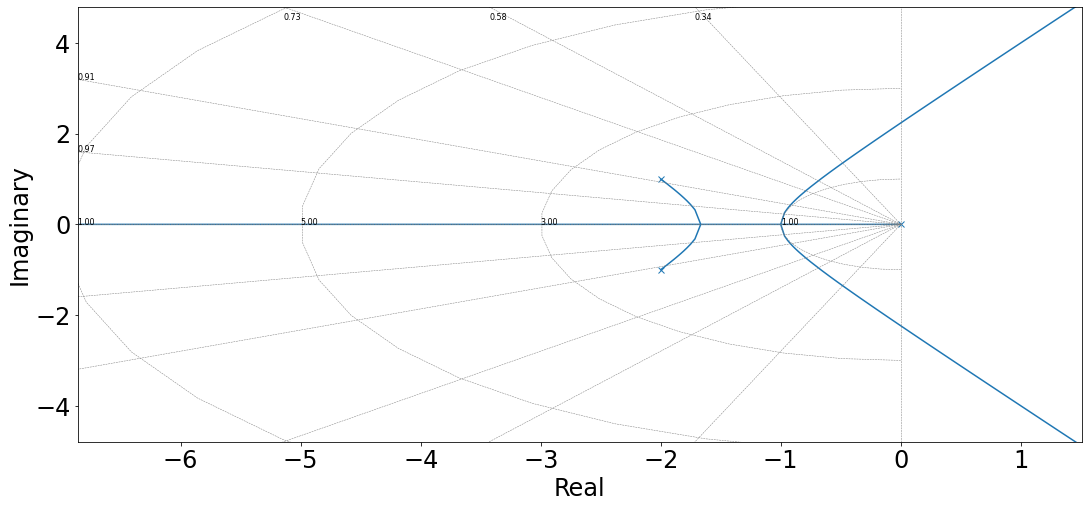

In [35]:
co.root_locus(G9);

## **Matriz de controlabilidade**

In [36]:
M = co.ctrb(A, B)
M

matrix([[ 0.,  0.,  1.],
        [ 0.,  1., -3.],
        [ 1., -3.,  7.]])

In [37]:
np.linalg.matrix_rank(M)

3

## **Matriz de observabilidade**

In [38]:
N = co.obsv(A, C)
N

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [39]:
np.linalg.matrix_rank(N)

3

## **Pole Placement (Linear State Variable Feedeback)**

In [40]:
np.linalg.eigvals(A)

array([-2.32471796+0.j        , -0.33764102+0.56227951j,
       -0.33764102-0.56227951j])

In [41]:
co.place(A, B, [-1, -2, 3])

matrix([[-7., -9., -3.]])

## **Formas canônicas**

In [42]:
sys7

A = [[ 0.  1.  0.]
 [ 0.  0.  1.]
 [-1. -2. -3.]]

B = [[0.]
 [0.]
 [1.]]

C = [[1. 0. 0.]]

D = [[0.]]

## **Forma canônica modal**

In [43]:
co.canonical_form(sys7, 'modal')

(A = [[-3.37641021e-01  5.62279512e-01  7.25866401e-17]
  [-5.62279512e-01 -3.37641021e-01 -2.11779475e-15]
  [ 1.66397295e-15 -1.11001742e-15 -2.32471796e+00]]
 
 B = [[ 0.29801018]
  [-1.05315798]
  [ 1.39929708]]
 
 C = [[-0.78684147  0.          0.16757468]]
 
 D = [[0.]], matrix([[-0.78684147,  0.        ,  0.16757468],
         [ 0.26566996, -0.44242484, -0.38956388],
         [ 0.15906535,  0.29876155,  0.90562614]]))

## **Forma canônica controlável**

In [44]:
co.canonical_form(sys7, 'reachable')

(A = [[-3. -2. -1.]
  [ 1.  0.  0.]
  [ 0.  1.  0.]]
 
 B = [[1.]
  [0.]
  [0.]]
 
 C = [[0. 0. 1.]]
 
 D = [[0.]], matrix([[1.77635684e-15, 0.00000000e+00, 1.00000000e+00],
         [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
         [1.00000000e+00, 0.00000000e+00, 0.00000000e+00]]))

## **Forma canônica observável**

In [45]:
co.canonical_form(sys7, 'observable')

(A = [[-3.  1.  0.]
  [-2.  0.  1.]
  [-1.  0.  0.]]
 
 B = [[0.]
  [0.]
  [1.]]
 
 C = [[1. 0. 0.]]
 
 D = [[0.]], matrix([[1., 0., 0.],
         [3., 1., 0.],
         [2., 3., 1.]]))

____________________________________________________________________________________________________

## **Laplace**

In [46]:
!pip install sympy

In [47]:
import sympy as sym
from sympy import exp
from sympy.abc import s,t,x,y,z
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform
import math

In [48]:
# Laplace transform (t->s)
U = laplace_transform(5*t, t, s)
print('U')
print(U[0])
# Result: 5/s**2

U
5/s**2


In [49]:
# Inverse Laplace transform (s->t)
X = inverse_laplace_transform(U[0],s,t)
print('X')
print(X)
# Result: 5*t*Heaviside(t)

X
5*t*Heaviside(t)


In [50]:
# Function
F = 5*(s+1)/(s+3)**2
print('F')
print(F)
# Result: (5*s + 5)/(s + 3)**2

F
(5*s + 5)/(s + 3)**2


In [51]:
# Partial fraction decomposition
G = sym.apart(F)
print('G')
print(G)
# Result: 5/(s + 3) - 10/(s + 3)**2

G
5/(s + 3) - 10/(s + 3)**2


In [52]:
# denominator of transfer function
d1 = (s+1)*(s+3)*(s**2+3*s+1)

In [53]:
# expand polynomial
d2 = sym.expand(d1)
print('d2')
print(d2)
# Result: s**4 + 7*s**3 + 16*s**2 + 13*s + 3

d2
s**4 + 7*s**3 + 16*s**2 + 13*s + 3


In [54]:
# find roots
print(sym.roots(d2))
# Result: {-1: 1, -3: 1, -3/2 - sqrt(5)/2: 1, -3/2 + sqrt(5)/2: 1}

{-1: 1, -3: 1, -3/2 - sqrt(5)/2: 1, -3/2 + sqrt(5)/2: 1}


In [55]:
# Laplace transform (t->s)
func = t * exp(-5*t)
U = laplace_transform(func, t, s)
print(U[0])
# Result: 5/s**2

(s + 5)**(-2)
